In [1]:
import numpy as np
from PIL import Image
img=Image.open('F:\\华为杯代码数据\\问题三\\数据\\问题三流程图.png')
img.show()


In [1]:
import xlwings as xw 
import os 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
os.chdir(r'F:\建模大赛\研究生数学建模\华为杯数据')
os.getcwd()

'F:\\建模大赛\\研究生数学建模\\华为杯数据'

In [2]:

df = pd.read_csv('caco2t.csv')# 读取excel需要注明具体哪一个工作簿,否则就是第一个工作簿
df.head()
df1 = pd.read_csv('Caco-2trainning20.csv')
df1.head()
df2 = pd.read_csv('Caco-2test.csv')
df2.head()
#df1=pd.read_csv('删除后training.csv',encoding = 'gbk',na_values='Na')
#df1

,WTPT-5,CrippenMR,ETA_EtaP_L,MLFER_E,SP-0,MW,ETA_BetaP,VAdjMat,SP-1,VABC,VPC-6,nAtom,DELS2,BCUTp-1h,HybRatio,XLogP,ATSm1,ETA_Shape_X,ETA_EtaP,maxsBr
0,0.0,156.5456,0.21028,3.539,30.139253,598.166139,1.36628,6.426265,20.733846,530.801600,5.274265,73,58.632387,12.729807,0.176471,2.526,55.323505,0.04065,0.88467,0
1,0.0,114.0156,0.19972,2.722,20.216968,384.136159,1.38793,5.857981,14.114194,362.353642,2.784421,49,25.635607,12.948458,0.080000,3.681,32.097876,0.00000,0.74014,0
2,0.0,120.5676,0.20126,2.744,21.794318,414.146724,1.36290,5.954196,15.046045,388.439853,2.934519,53,29.635270,13.017161,0.115385,3.710,34.872345,0.00000,0.78224,0
3,0.0,113.9736,0.19771,2.604,21.087211,402.126737,1.38333,5.906891,14.508040,368.421201,2.862984,49,36.861454,12.942770,0.080000,3.586,34.599920,0.00000,0.75092,0
4,0.0,119.2026,0.21715,2.921,21.087211,418.103894,1.36667,5.906891,14.508040,378.139998,3.973493,49,32.406958,13.576771,0.080000,3.978,39.953204,0.00000,0.81744,0


In [3]:
#Caco-2
x, y = df.iloc[:, 1:].values, df.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [4]:
feat_labels = df.columns[0:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=1)
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.9494097807757167

In [12]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] #[::-1]表示将各指标按权重大小进行排序输出
indices[:20]
for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) WTPT-5                         0.024163
 2) CrippenMR                      0.022552
 3) ETA_EtaP_L                     0.020418
 4) MLFER_E                        0.019588
 5) SP-0                           0.019064
 6) MW                             0.018504
 7) ETA_BetaP                      0.017201
 8) VAdjMat                        0.017080
 9) SP-1                           0.015879
10) VABC                           0.014827
11) VPC-6                          0.014758
12) nAtom                          0.014147
13) DELS2                          0.014029
14) BCUTp-1h                       0.013883
15) HybRatio                       0.012514
16) XLogP                          0.011006
17) ATSm1                          0.011000
18) ETA_Shape_X                    0.010781
19) ETA_EtaP                       0.010715
20) maxsBr                         0.010240


In [100]:
#导出权重
data=[]
for f in range(20):
#for f in range(x_train.shape[1]):
    data.append(" %s" % (feat_labels[indices[f]]))
    data.append(" %f" % (importances[indices[f]]))
    n=2
    
data2=[]
for i in range(0,len(data),n):#将列表每2个组成一个小列表，
    a=data[i:i + n]
    data2.append(a)

da = pd.DataFrame(data2)
da
da.to_csv('权重.csv')

NameError: name 'feat_labels' is not defined

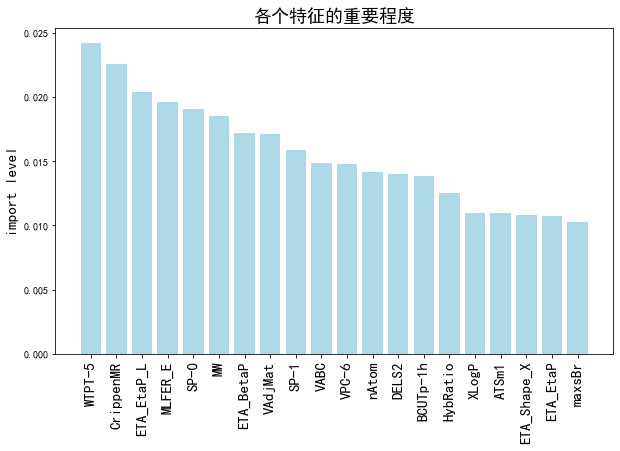

In [16]:
# 筛选变量（选择重要性比较高的变量）
threshold = 0.01
x_selected = x_train[:,importances > threshold]
# 可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("各个特征的重要程度",fontsize = 18)
plt.ylabel("import level",fontsize = 15,rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
x_columns= df2.columns[0:]
for i in range(x_columns.shape[0]):
    plt.bar(i,importances[indices[i]],color='lightblue',align='center')
    plt.xticks(np.arange(x_columns.shape[0]),x_columns,rotation=90,fontsize=15)
plt.show()

# 1.逻辑回归

In [12]:
#########逻辑回归############
#导入模型
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()

In [13]:
df1 = pd.read_csv('Caco-2trainning20.csv')
df1.head()
#df2 = pd.read_csv('Caco-2test.csv')
#df2.head()

,Caco-2,WTPT-5,CrippenMR,ETA_EtaP_L,MLFER_E,SP-0,MW,ETA_BetaP,VAdjMat,SP-1,...,VPC-6,nAtom,DELS2,BCUTp-1h,HybRatio,XLogP,ATSm1,ETA_Shape_X,ETA_EtaP,maxsBr
0,0,3.406628,122.6000,0.32236,2.529,21.045395,439.218115,1.04839,5.954196,15.259153,...,5.510599,64,21.138306,13.254859,0.538462,4.666,39.811140,0.0,1.11373,0.0
1,0,3.406648,131.8340,0.33313,2.529,22.459608,467.249415,1.01515,6.044394,16.259153,...,5.746301,70,21.706811,13.617609,0.571429,5.804,41.811140,0.0,1.19461,0.0
2,0,3.406644,133.3328,0.26334,3.133,22.622745,463.181729,1.21970,6.044394,16.153000,...,4.507677,62,27.461626,13.393453,0.333333,2.964,42.585609,0.0,0.95054,0.0
3,0,3.406624,131.8340,0.33262,2.529,22.459608,467.249415,1.01515,6.044394,16.242316,...,5.150641,70,21.399327,13.079547,0.571429,6.015,41.811140,0.0,1.17776,0.0
4,0,3.406624,130.7880,0.27255,2.960,22.459608,461.202465,1.19697,6.044394,16.242316,...,4.401611,64,21.703258,13.043454,0.357143,4.462,41.811140,0.0,0.97753,0.0


In [14]:
#训练模型
x,y= df1.iloc[:, 1:].values, df1.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
modelLR.fit(x_train,y_train)
modelLR.score(x_test,y_test)

C:\Users\13997\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.851602023608769

In [15]:
y_predict = modelLR.predict(df2)
y_predict 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
y_predict = pd.DataFrame({'lo_pre':y_predict})
y_predict.to_csv('caco_lopre.csv',encoding='utf-8',index=False)

In [29]:
# 模型评估
import sklearn.metrics as metrics
y_result= modelLR.predict(x_test)
print("逻辑回归准确度:")
print(metrics.classification_report(y_test,y_result))

逻辑回归准确度:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       359
           1       0.83      0.79      0.81       234

    accuracy                           0.85       593
   macro avg       0.85      0.84      0.84       593
weighted avg       0.85      0.85      0.85       593



In [82]:
#逻辑交叉验证
#print('交叉验证5次acc',cross_val_score(modelLR,x,y,cv=10,scoring="accuracy"))
#森林交叉验证
#print('交叉验证5次acc',cross_val_score(clf_rf,x,y,cv=20,scoring="accuracy"))
#bagbing交叉验证
#print('交叉验证5次acc',cross_val_score(clf_bagging,x,y,cv=10,scoring="accuracy"))
#adaboost交叉验证
#print('交叉验证5次acc',cross_val_score(ada_clf2,x,y,cv=10,scoring="accuracy"))

交叉验证5次acc [0.86868687 0.68686869 0.93939394 0.85858586 0.81818182 0.56565657
 0.74747475 0.80808081 0.83838384 0.88888889 0.84848485 0.82828283
 0.7979798  0.81818182 0.82653061 0.67346939 0.93877551 0.86734694
 0.74489796 0.82653061]


In [16]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn import model_selection
#roc_auc_score(y_test, model.score)
y_score = modelLR.fit(x_train, y_train).decision_function(x_test)
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
roc_auc

C:\Users\13997\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9164107325667215

<Figure size 432x288 with 0 Axes>

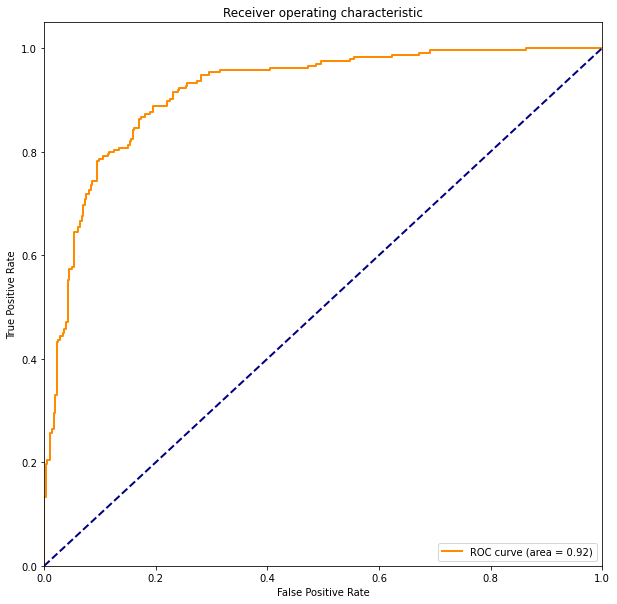

In [17]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 2.支持向量机

In [4]:
#############支持向量机###########
import xlwings as xw 
import os 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import GridSearchCV

In [6]:
os.chdir(r'F:\建模大赛\研究生数学建模\华为杯数据')
os.getcwd()
df1 = pd.read_csv('Caco-2trainning20.csv')
df2 = pd.read_csv('Caco-2test.csv')
df3= pd.read_csv('Caco-2trainningSVM.csv')

modelSVM = svm.SVC(C=1,kernel='linear', gamma=1,probability=True,decision_function_shape="ovr")
x1,y1= df3.iloc[:, 1:].values, df3.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 0)
modelSVM.fit(x_train1, y_train1)
modelSVM.score(x_test1, y_test1)

0.863406408094435

In [8]:
os.chdir(r'F:\建模大赛\研究生数学建模\华为杯数据')
os.getcwd()
df1 = pd.read_csv('Caco-2trainning20.csv')
df2 = pd.read_csv('Caco-2test.csv')
df3= pd.read_csv('Caco-2trainningSVM.csv')

modelSVM = svm.SVC(C=1,kernel='rbf', gamma=1,probability=True,decision_function_shape="ovr")
x1,y1= df1.iloc[:, 1:].values, df1.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 0)
modelSVM.fit(x_train1, y_train1)
modelSVM.score(x_test1, y_test1)
predicted2= modelSVM.predict(df2)
predicted2
# 模型评估
import sklearn.metrics as metrics
y_result2= modelSVM.predict(x_test1)
print("逻辑回归准确度:")
print(metrics.classification_report(y_test,y_result2))

逻辑回归准确度:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       359
           1       0.95      0.26      0.41       234

    accuracy                           0.70       593
   macro avg       0.81      0.63      0.61       593
weighted avg       0.78      0.70      0.65       593



In [33]:
predicted1= modelSVM.predict(df2)
predicted1
y_predict = pd.DataFrame({'svm_pre':predicted1})
y_predict.to_csv('caco_svmpre.csv',encoding='utf-8',index=False)

In [34]:
# 模型评估
import sklearn.metrics as metrics
y_result= modelSVM.predict(x_test)
print("逻辑回归准确度:")
print(metrics.classification_report(y_test,y_result))

逻辑回归准确度:
              precision    recall  f1-score   support

          -1       0.91      0.86      0.88       359
           1       0.80      0.87      0.83       234

    accuracy                           0.86       593
   macro avg       0.86      0.86      0.86       593
weighted avg       0.87      0.86      0.86       593



In [61]:
#交叉验证
print('交叉验证5次acc',cross_val_score(modelSVM,x,y,cv=5,scoring="accuracy"))

交叉验证5次acc [0.79746835 0.64050633 0.8278481  0.78987342 0.84517766]


0.9250648763183582


<Figure size 432x288 with 0 Axes>

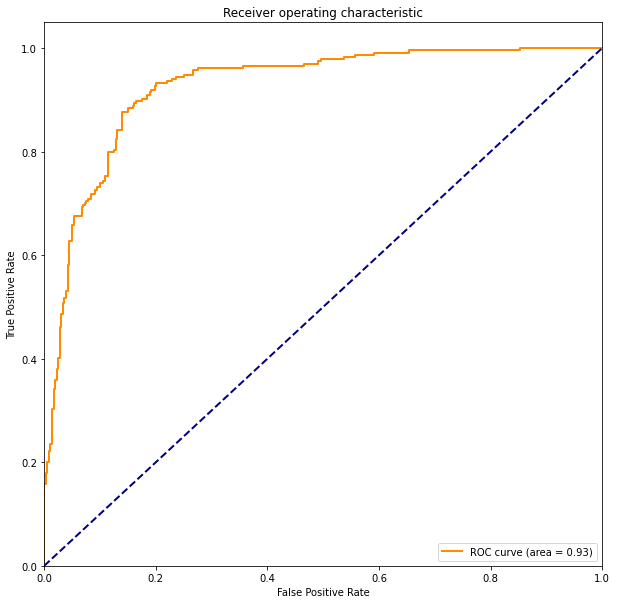

In [35]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn import model_selection
#roc_auc_score(y_test, model.score)
y_score = modelSVM.fit(x_train, y_train).decision_function(x_test)
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 3.随机森林

In [6]:
##########随机森林##############
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt

In [7]:
df1 = pd.read_csv('Caco-2trainning20.csv')
df2 = pd.read_csv('Caco-2test.csv')
x,y= df1.iloc[:, 1:].values, df1.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
clf_rf = RandomForestClassifier(n_estimators=1000,max_depth=None, min_samples_split=2,random_state=0)
clf_rf.fit(x_train,y_train)
clf_rf.score(x_test, y_test)

0.9207419898819561

In [5]:
df1 = pd.read_csv('Caco-2trainning20.csv')
df2 = pd.read_csv('Caco-2test.csv')
x,y= df1.iloc[:, 1:].values, df1.iloc[:, 0].values #0表示从第一列开始，即索引下标为0的列
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train,y_train)
forest.score(x_test, y_test)

0.9190556492411467

In [64]:
prediction_list2=clf_rf.predict(df2)
prediction_list2 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
prediction_list2=clf_rf.predict(df2)
prediction_list2 

In [65]:
prediction_list2 = pd.DataFrame({'pre':prediction_list2 })
prediction_list2 .to_csv('caco_pre4.csv',encoding='utf-8',index=False)

In [74]:
#交叉验证
print('交叉验证5次acc',cross_val_score(clf_rf,x,y,cv=10,scoring="accuracy"))
mse=cross_val_score(clf_rf,x,y,cv=10,scoring="accuracy")
np.mean(mse)

交叉验证5次acc [0.79292929 0.86363636 0.54040404 0.77272727 0.85786802 0.7715736
 0.80203046 0.7106599  0.9035533  0.82741117]


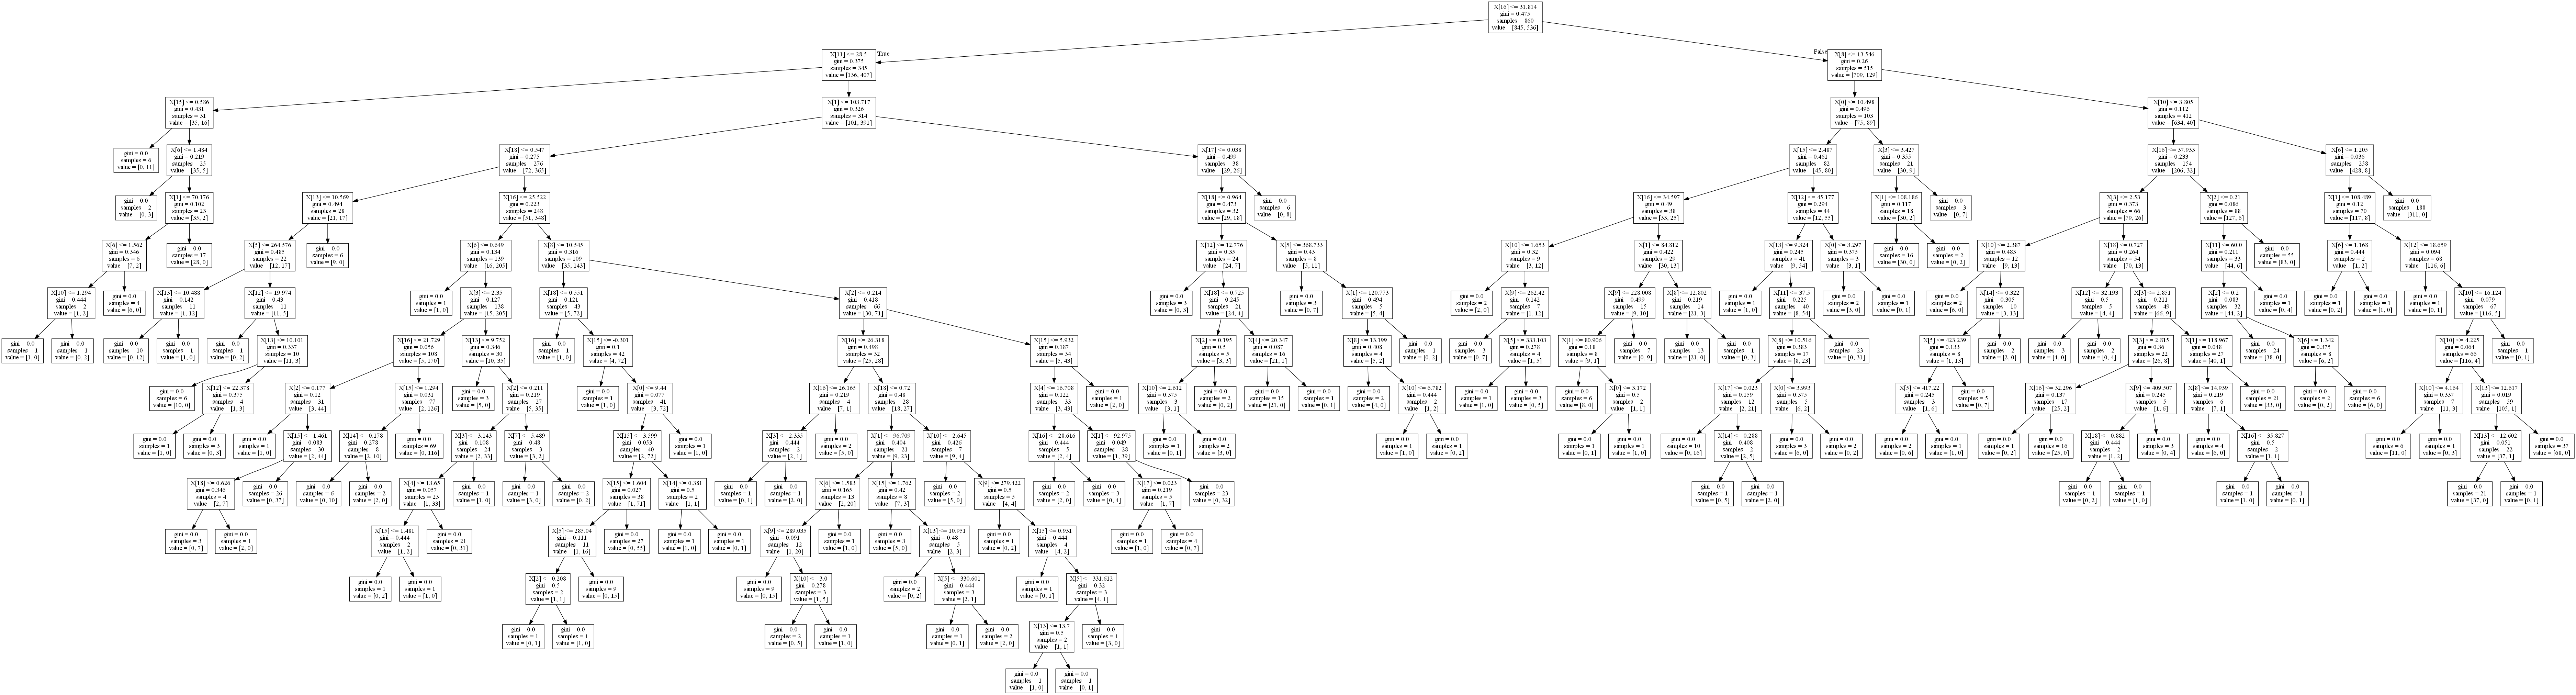

In [39]:
#可视化
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
# 执行一次
# os.environ['PATH'] = os.environ['PATH']+';'+r"D:\CLibrary\Graphviz2.44.1\bin\graphviz"
pipe = Pipeline([('scaler', StandardScaler()), ('reduce_dim', PCA()),
                 ('forest', clf_rf)])
dot_data = StringIO()
export_graphviz(pipe.named_steps['forest'].estimators_[0],
                out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [40]:
# 模型评估
import sklearn.metrics as metrics
y_result= clf_rf.predict(x_test)
print("逻辑回归准确度:")
print(metrics.classification_report(y_test,y_result))

逻辑回归准确度:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       359
           1       0.90      0.90      0.90       234

    accuracy                           0.92       593
   macro avg       0.92      0.92      0.92       593
weighted avg       0.92      0.92      0.92       593



In [8]:
import sklearn.metrics as metrics
y_score = clf_rf.fit(x_train, y_train)
# Compute ROC curve and ROC area for each class
y_pred=clf_rf.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test.ravel(), y_pred[:,1].ravel()) ###计算真正率和假正率
rf_auc = metrics.auc(fpr,tpr) ###计算auc的值
rf_auc

0.9727936099802396

0.9727936099802396


<Figure size 432x288 with 0 Axes>

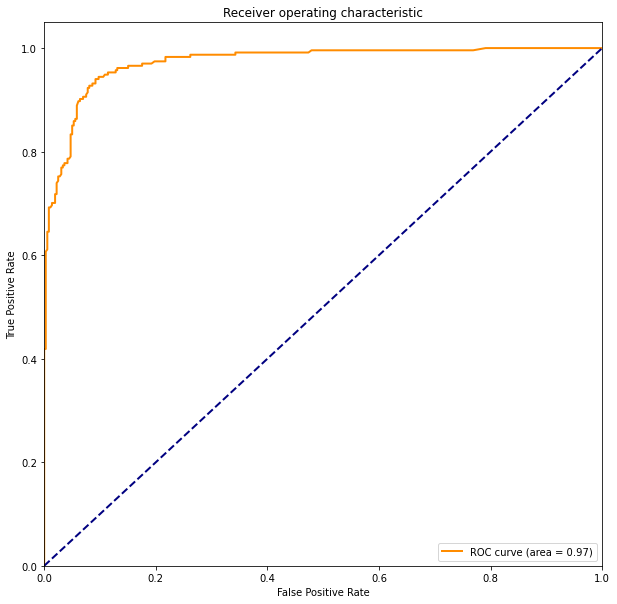

In [18]:
import sklearn.metrics as metrics
y_score = clf_rf.fit(x_train, y_train)
# Compute ROC curve and ROC area for each class
y_pred=clf_rf.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test.ravel(), y_pred[:,1].ravel()) ###计算真正率和假正率
roc_auc = metrics.auc(fpr,tpr) ###计算auc的值
roc_auc
print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 4.bagging

In [28]:
###############bagging#######################
import xlwings as xw 
import os 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(n_estimators=1000,random_state=0,warm_start=True)
# fitting bagging model
x,y= df1.iloc[:, 1:].values, df1.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
clf_bagging.fit(x_train,y_train)
clf_bagging.score(x_test, y_test)

0.9190556492411467

In [29]:
import sklearn.metrics as metrics
y_score = clf_bagging.fit(x_train, y_train)
# Compute ROC curve and ROC area for each class
y_pred=clf_bagging.predict_proba(x_test)
fpr,tpr,threshold = metrics.roc_curve(y_test.ravel(), y_pred[:,1].ravel()) ###计算真正率和假正率
roc_auc = metrics.auc(fpr,tpr) ###计算auc的值
roc_auc

C:\Users\13997\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:352: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


0.9734780848986978

0.9734780848986978


<Figure size 432x288 with 0 Axes>

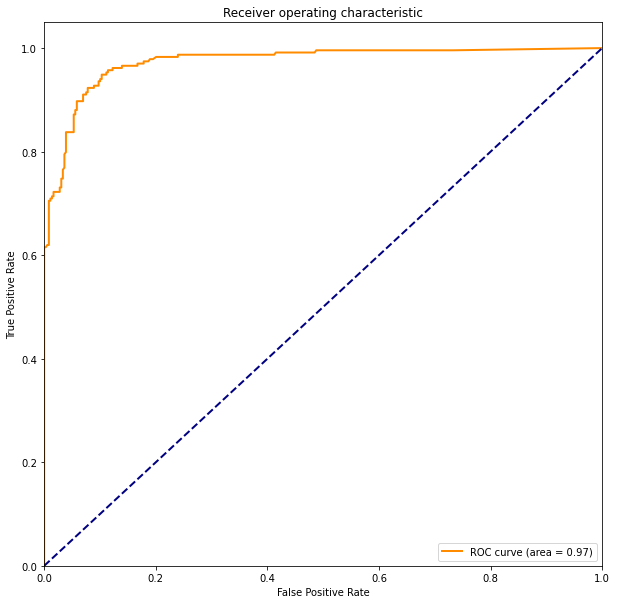

In [30]:

print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [68]:
# predict bagging model
prediction_list = clf_bagging.predict(df2)
prediction_list = pd.DataFrame({'bagging_pre':prediction_list })
prediction_list .to_csv('caco_bagpre.csv',encoding='utf-8',index=False)

In [69]:
#交叉验证
print('交叉验证5次acc',cross_val_score(clf_bagging,x,y,cv=5,scoring="accuracy"))

交叉验证5次acc [0.69113924 0.64303797 0.78481013 0.67848101 0.84263959]


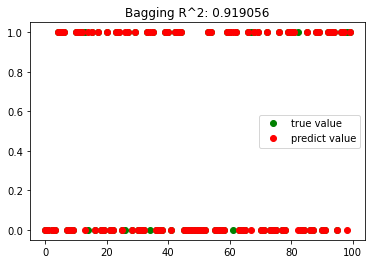

In [31]:
#得分拟合图
result = clf_bagging.predict(x_test)
score=clf_bagging.score(x_test,y_test)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(len(y_test[:100])), y_test[:100],'go',label='true value')
plt.plot(np.arange(len(result[:100])),result[:100],'ro',label='predict value')
plt.title('Bagging R^2: %f'%score)
plt.legend()        # 将样例显示出来
plt.show()

In [13]:
# 模型评估
import sklearn.metrics as metrics
y_result= clf_bagging.predict(x_test)
print("逻辑回归准确度:")
print(metrics.classification_report(y_test,y_result))

逻辑回归准确度:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       359
           1       0.89      0.90      0.90       234

    accuracy                           0.92       593
   macro avg       0.91      0.92      0.92       593
weighted avg       0.92      0.92      0.92       593



# 5.Ada boosting

In [15]:
############################# Ada boosting #####################################
 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_blobs
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier

In [27]:
ada_clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=1000)
ada_clf2.fit(x_train, y_train)
ada_clf2.score(x_test, y_test)

0.9123102866779089

In [72]:
# 模型评估
import sklearn.metrics as metrics
y_result= ada_clf2.predict(x_test)
print("ada准确度:")
print(metrics.classification_report(y_test,y_result))

ada准确度:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       359
           1       0.89      0.90      0.89       234

    accuracy                           0.91       593
   macro avg       0.91      0.91      0.91       593
weighted avg       0.91      0.91      0.91       593



In [73]:
#交叉验证
print('交叉验证5次acc',cross_val_score(ada_clf2,x,y,cv=5,scoring="accuracy"))

交叉验证5次acc [0.76962025 0.65063291 0.6835443  0.73924051 0.85532995]


0.9658238697235912


<Figure size 432x288 with 0 Axes>

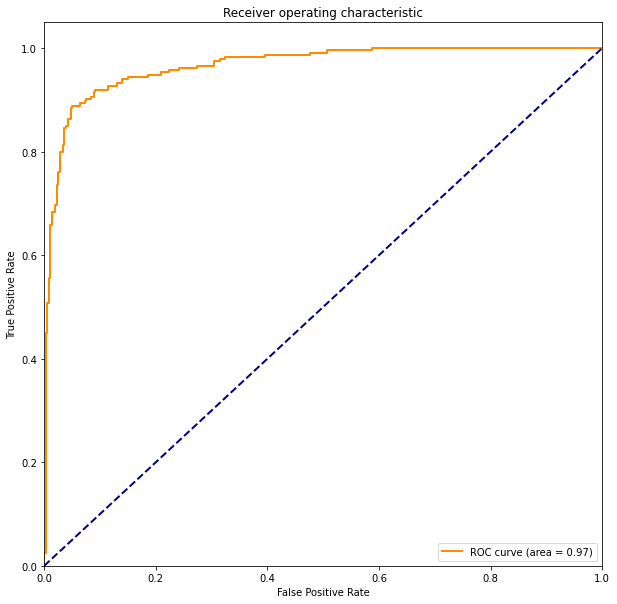

In [51]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn import model_selection
#roc_auc_score(y_test, model.score)
y_score = ada_clf2.fit(x_train, y_train).decision_function(x_test)
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

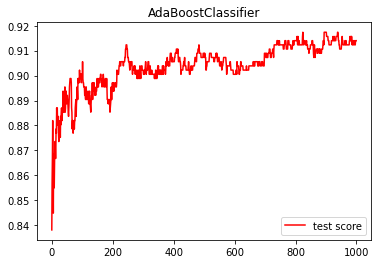

In [52]:
result1=list(ada_clf2.staged_score(x_train,y_train))
result2=list(ada_clf2.staged_score(x_test,y_test))
plt.figure() 
#plt.plot(np.arange(500), result1[:500], "b-", label="train score") 
plt.plot(np.arange(1000), result2[:1000], "r-", label="test score") 
plt.legend(loc="best")
plt.title("AdaBoostClassifier")
#plt.ylim(0.5,1)
plt.show()

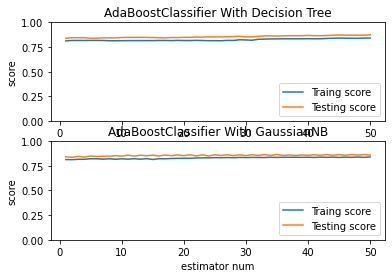

In [53]:
####不同类型个体分类器的影响
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
#from sklearn import cross_validation
from sklearn import ensemble
from sklearn import naive_bayes
def test_AdaBoostClassifier_Base_classifier(*data):
    X_train, X_test, y_train, y_test = data
    ##绘图
    fig = plt.figure()
    ax = fig.add_subplot(2,1,1)
    ###默认的分类器
    clf = AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    estimators_num = len(clf.estimators_)
    X = range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label='Traing score')
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label='Testing score')
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc='lower right')
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier With Decision Tree")
    ###默认的贝叶斯分类器
    ax = fig.add_subplot(2,1,2)
    clf = AdaBoostClassifier(learning_rate=0.1,base_estimator=naive_bayes.GaussianNB())
    clf.fit(X_train, y_train)
    estimators_num = len(clf.estimators_)
    X = range(1, estimators_num + 1)
    ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label='Traing score')
    ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label='Testing score')
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc='lower right')
    ax.set_ylim(0, 1)
    ax.set_title("AdaBoostClassifier With GaussianNB")
    plt.show()

#X_train,X_test,y_train,y_test = load_data_classification()
test_AdaBoostClassifier_Base_classifier(x_train,x_test,y_train,y_test)

In [ ]:
#逻辑交叉验证
#print('交叉验证5次acc',cross_val_score(modelLR,x,y,cv=10,scoring="accuracy"))
#逻辑交叉验证
#print('交叉验证5次acc',cross_val_score(modelSVM,x1,y1,cv=10,scoring="accuracy"))
#森林交叉验证
#print('交叉验证5次acc',cross_val_score(clf_rf,x,y,cv=20,scoring="accuracy"))
#bagbing交叉验证
#print('交叉验证5次acc',cross_val_score(clf_bagging,x,y,cv=20,scoring="accuracy"))
#adaboost交叉验证
#print('交叉验证5次acc',cross_val_score(ada_clf2,x,y,cv=10,scoring="accuracy"))


In [101]:
mse1=cross_val_score(modelLR,x,y,cv=50,scoring="accuracy")
mse11=np.mean(mse1)

C:\Users\13997\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\13997\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\13997\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\13997\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\13997\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\13997\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [102]:
mse2=cross_val_score(modelSVM,x1,y1,cv=50,scoring="accuracy")
print(np.mean(mse2))
mse3=cross_val_score(clf_rf,x,y,cv=50,scoring="accuracy")
print(np.mean(mse3))
mse4=cross_val_score(clf_bagging,x,y,cv=50,scoring="accuracy")
print(np.mean(mse4))
mse5=cross_val_score(ada_clf2,x,y,cv=50,scoring="accuracy")
print(np.mean(mse5))

0.829397435897436
0.837448717948718
0.8394358974358974
0.8283205128205128
